In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.model_selection import learning_curve

In [58]:
Path_to_data = r"D:\Projects\climate change\climate-ds.csv"
data = pd.read_csv(Path_to_data, index_col=['Unnamed: 0'])
data.head(10)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
5,Albania,Wheat,1990,1485,121.00,16.37,30197
6,Albania,Maize,1991,1485,121.00,15.36,29068
7,Albania,Potatoes,1991,1485,121.00,15.36,77818
8,Albania,"Rice, paddy",1991,1485,121.00,15.36,28538
9,Albania,Sorghum,1991,1485,121.00,15.36,6667


In [3]:
rows , columns = data.shape

print('There are {} rows and {} columns.'.format(rows,columns))

There are 28242 rows and 7 columns.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [5]:
data.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.00,28242.00,28242.00,28242.00,28242.00
mean,2001.54,1149.06,37076.91,20.54,77053.33
std,7.05,709.81,59958.78,6.31,84956.61
min,1990.00,51.00,0.04,1.30,50.00
25%,1995.00,593.00,1702.00,16.70,19919.25
50%,2001.00,1083.00,17529.44,21.51,38295.00
75%,2008.00,1668.00,48687.88,26.00,104676.75
max,2013.00,3240.00,367778.00,30.65,501412.00


In [6]:
data.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [7]:
data["Item"].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [8]:
data = data.drop(["Year"], axis=1)

In [9]:
data.head(10)

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1485,121.00,16.37,36613
1,Albania,Potatoes,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1485,121.00,16.37,23333
3,Albania,Sorghum,1485,121.00,16.37,12500
4,Albania,Soybeans,1485,121.00,16.37,7000
5,Albania,Wheat,1485,121.00,16.37,30197
6,Albania,Maize,1485,121.00,15.36,29068
7,Albania,Potatoes,1485,121.00,15.36,77818
8,Albania,"Rice, paddy",1485,121.00,15.36,28538
9,Albania,Sorghum,1485,121.00,15.36,6667


In [10]:
data = pd.get_dummies(data, columns=['Area',"Item"])

In [11]:
data.head(10)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485,121.00,16.37,36613,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485,121.00,16.37,66667,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485,121.00,16.37,23333,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485,121.00,16.37,12500,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485,121.00,16.37,7000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1485,121.00,16.37,30197,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1485,121.00,15.36,29068,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1485,121.00,15.36,77818,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1485,121.00,15.36,28538,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1485,121.00,15.36,6667,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X = data.loc[:, data.columns != 'hg/ha_yield']
Y = data['hg/ha_yield']

In [13]:
X.head(10)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485,121.00,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1485,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1485,121.00,15.36,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1485,121.00,15.36,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1485,121.00,15.36,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1485,121.00,15.36,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
Y.head(10)

0    36613
1    66667
2    23333
3    12500
4     7000
5    30197
6    29068
7    77818
8    28538
9     6667
Name: hg/ha_yield, dtype: int64

In [15]:
x_max = X.max()
X = X.divide(x_max)
X.describe()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,...,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00
mean,0.35,0.10,0.67,0.00,0.00,0.01,0.01,0.00,0.03,0.00,...,0.07,0.15,0.02,0.15,0.12,0.11,0.11,0.10,0.14,0.03
std,0.22,0.16,0.21,0.06,0.06,0.08,0.11,0.05,0.18,0.06,...,0.26,0.35,0.14,0.36,0.32,0.31,0.32,0.30,0.34,0.17
min,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.33,0.05,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.51,0.13,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [16]:
print(X.shape)
print(Y.shape)

(28242, 114)
(28242,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
print(x_train.shape)
print(y_train.shape)

(22593, 114)
(22593,)


In [27]:
chosen_regressors = [
    'RandomForestRegressor',
    'BaggingRegressor',
    'XGBRegressor',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'DecisionTreeRegressor',
    'SGDRegressor',
    'LinearRegression'
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]

In [28]:
reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 14%|█▍        | 1/7 [00:02<00:13,  2.29s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5195768843709138, 'Adjusted R-Squared': 0.5096802029141527, 'RMSE': 59032.46300125445, 'Time taken': 2.285067081451416}


 29%|██▊       | 2/7 [00:03<00:08,  1.69s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9712500574570859, 'Adjusted R-Squared': 0.9706578107187607, 'RMSE': 14441.005934058876, 'Time taken': 1.2651476860046387}


 43%|████▎     | 3/7 [00:03<00:04,  1.03s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9613745124829245, 'Adjusted R-Squared': 0.9605788302319402, 'RMSE': 16738.477116022772, 'Time taken': 0.2472245693206787}


 71%|███████▏  | 5/7 [00:07<00:02,  1.28s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8635650995312147, 'Adjusted R-Squared': 0.8607545504431335, 'RMSE': 31458.76687631324, 'Time taken': 3.308006525039673}
{'Model': 'LinearRegression', 'R-Squared': 0.7493618067878629, 'Adjusted R-Squared': 0.7441986781239338, 'RMSE': 42638.56513687107, 'Time taken': 0.13511395454406738}


 86%|████████▌ | 6/7 [00:17<00:04,  4.29s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9736469546692591, 'Adjusted R-Squared': 0.9731040838402558, 'RMSE': 13825.930213281763, 'Time taken': 10.126185178756714}


100%|██████████| 7/7 [00:17<00:00,  2.51s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.741413963562933, 'Adjusted R-Squared': 0.7360871099030439, 'RMSE': 43309.33253423219, 'Time taken': 0.23035788536071777}


In [29]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.97,0.97,13825.93,10.13
BaggingRegressor,0.97,0.97,14441.01,1.27
DecisionTreeRegressor,0.96,0.96,16738.48,0.25
GradientBoostingRegressor,0.86,0.86,31458.77,3.31
LinearRegression,0.74,0.75,42638.57,0.14
SGDRegressor,0.74,0.74,43309.33,0.23
AdaBoostRegressor,0.51,0.52,59032.46,2.29


In [33]:
model_rfg = RandomForestRegressor(n_estimators = 100, random_state = 0)

model_rfg.fit(x_train, y_train)
print('Model trained!')

Model trained!


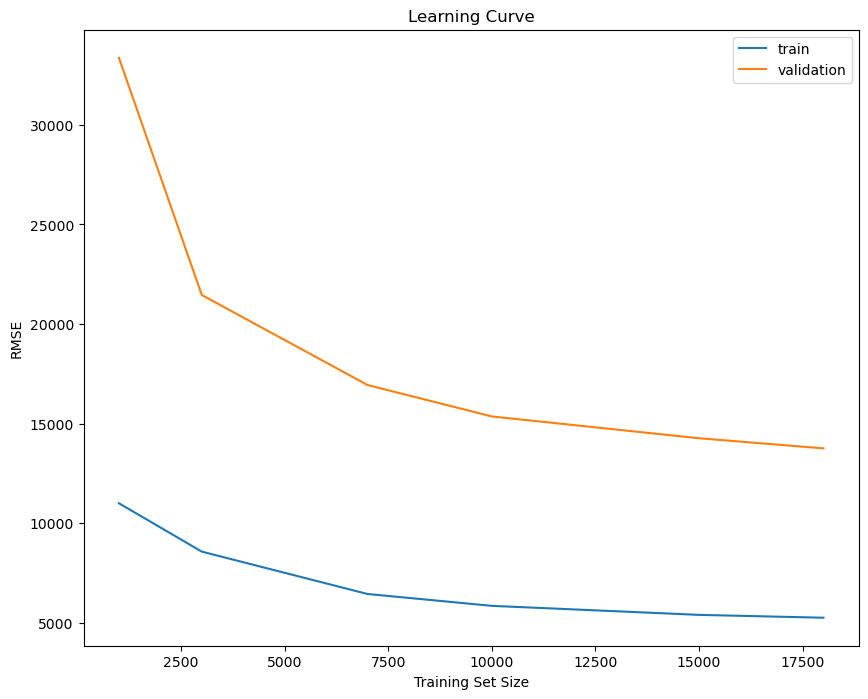

In [51]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rfg,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1000, 3000, 7000, 10000, 15000, 18000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

In [52]:
print('Model score {}'.format(model_rfg.score(x_test, y_test)))

Model score 0.9737621063109473


In [53]:
y_test = pd.DataFrame(y_test)

In [54]:
y_test["yield_predicted"]= model_rfg.predict(x_test)

In [55]:
y_test.head(10)

,hg/ha_yield,yield_predicted
25564,69220,71405.79
18113,20000,23741.06
25607,51206,53899.24
6815,166986,155426.20
18144,56319,52806.89
12680,26163,26163.00
3474,30708,30523.14
22381,109771,110049.57
20656,241650,237031.20
23170,47500,44156.99


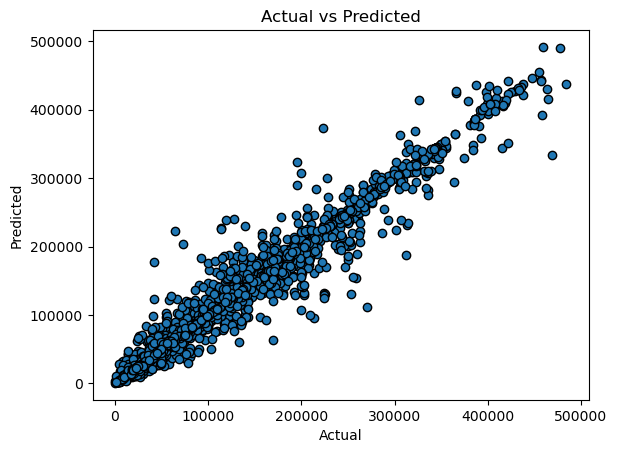

In [56]:
fig, ax = plt.subplots() 

ax.scatter(y_test["hg/ha_yield"], y_test["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()